## Problem 3: Visual story telling part 1: green buildings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
gb_data = pd.read_csv("data/greenbuildings.csv")

# Follow the analyst intuition and remove row with lover than 10% leasing rate
gb_data = gb_data[gb_data["leasing_rate"] >= 10]
gb_data

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


We have some comments about the data. We do not agree with the Excel guru. First, the removal of buildings with low occupancy rates could heavily distort our results. If low occupancy rates are an influential predictor then removing it is removing potentially very informative data about how certain building aspects can decrease occupancy, especially when comparing these buildings to other buildings in the area. As you can see from the chart below, very low occupancy rates disproportionately affects non-green buildings. By removing these buildings you are artificially manipulating the data to improve the outlook for non-green buildings.

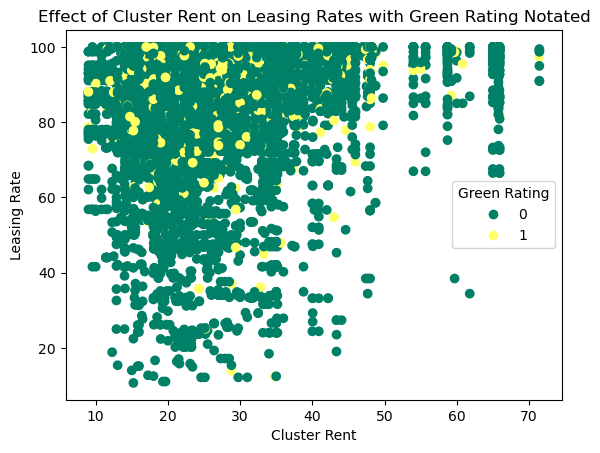

In [4]:
sc = plt.scatter(gb_data['cluster_rent'], gb_data['leasing_rate'], c=gb_data['green_rating'], cmap='summer')
plt.xlabel('Cluster Rent')
plt.ylabel('Leasing Rate')
plt.title('Effect of Cluster Rent on Leasing Rates with Green Rating Notated')
plt.legend(*sc.legend_elements(num=1),loc="center right", title="Green Rating")
plt.show()

Next, we disagree with the decision to look at the green buildings and non-green buildings separately. The data was collected very intentionally to pull in non-green buildings within a quarter mile, so we can, at least partially, control for the significant impact that location has on building rates and occupancy. The graph below demonstrates the large effect that clustering has on our variables. By looking at the difference in scale between the clustered and unclustered rent values you can see how looking at rent values outside of the context of local averages can lead to very different figures.

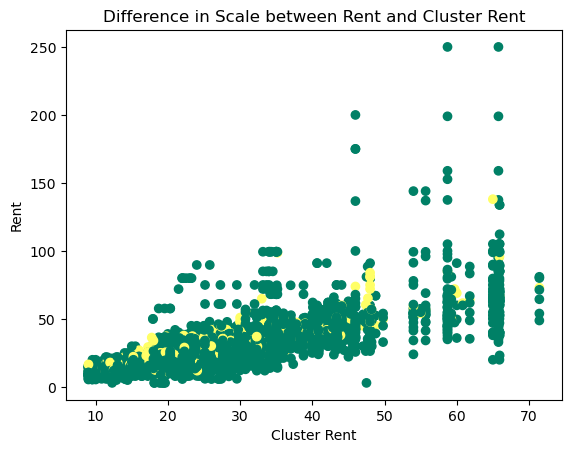

In [5]:
plt.scatter(gb_data['cluster_rent'], gb_data['Rent'], c=gb_data['green_rating'], cmap='summer')
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Difference in Scale between Rent and Cluster Rent')
plt.show()

While the median does control for outliers, for this data set it is not recommended to look at median over mean because as you can see below many of the outliers that you are discounting belong to the building size that we are looking to occupy. These data points are especially important for us as we look at how building size can affect rent pricing.

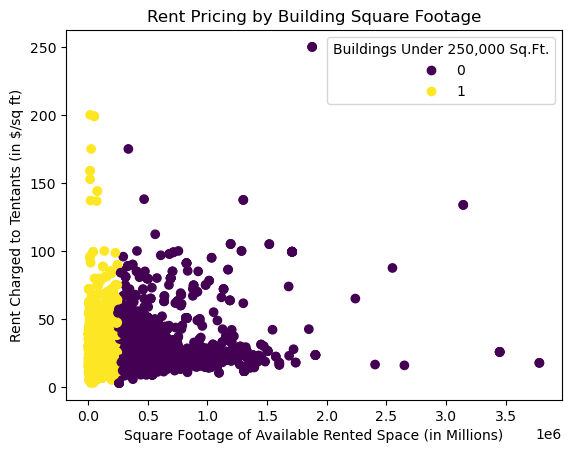

In [6]:
sr = plt.scatter(gb_data['size'], gb_data['Rent'], c=(gb_data['size']<250000))
plt.xlabel('Square Footage of Available Rented Space (in Millions)')
plt.ylabel('Rent Charged to Tentants (in $/sq ft)')
plt.title('Rent Pricing by Building Square Footage')
plt.legend(*sr.legend_elements(num=1),loc="upper right", title="Buildings Under 250,000 Sq.Ft.")
plt.show()

One possible confounding variable is that green rated buildings are naturally newer. The age of the building could a counfounding variable because younger buildings could charge more for rent and green rated buildings tend to be newer. As you can see for the table below, the average age for green rated buildings is much lower. From the chart below, you can see that rent prices have a negative correlation with age of the building. These observations both provide evidence that age could be a confounding variable.

In [7]:
gb_data.groupby(['green_rating'])['age'].agg(['mean', 'count', 'median'])


,mean,count,median
green_rating,,,
0,49.308077,6995,36.0
1,23.880117,684,22.0


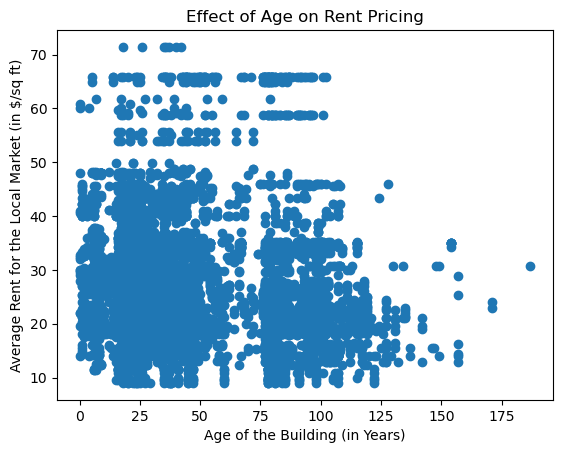

In [8]:
plt.scatter(gb_data['age'], gb_data['cluster_rent'])
plt.xlabel('Age of the Building (in Years)')
plt.ylabel('Average Rent for the Local Market (in $/sq ft)')
plt.title('Effect of Age on Rent Pricing')
plt.show()

Another possible confounding variable would be the Class A indicator because green rated buildings are generally higher quality buildings and come with more investment. In the table below, it shows that green rated buildings are much more likely to be Class A. In the second table below, you can see how rent for Class A buildings is higher, as expected, and this holds true for the rent not averaged by local market as well. To potentially 'adjust' for this confounder we could look at the difference in rent within Class B between green rated buildings and non-rated buildings. After graphing Class B buildings, it appears that green rated buildings actually charge less rent on average than non-rated buildings

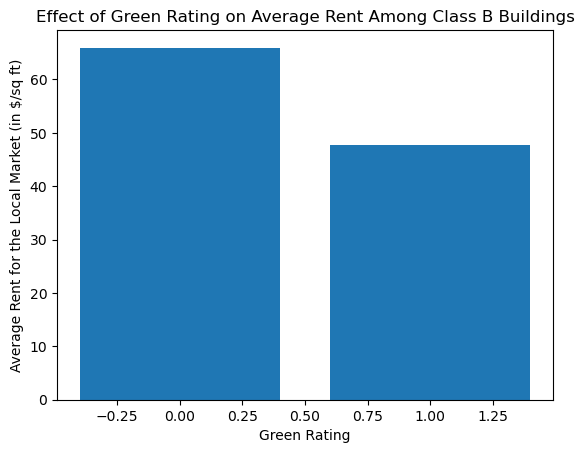

In [9]:
classb_mask = gb_data[gb_data['class_b'] == 1]
plt.bar(classb_mask['green_rating'], classb_mask['cluster_rent'])
plt.xlabel('Green Rating')
plt.ylabel('Average Rent for the Local Market (in $/sq ft)')
plt.title('Effect of Green Rating on Average Rent Among Class B Buildings')
plt.show()

Next, We disagree with the decision to look at the green buildings and non-green buildings separately. The data was collected very intentionally to pull in non-green buildings within a quarter mile, so we can, at least partially, control for the significant impact that location has on building rates and occupancy. The graph below demonstrates the large effect that clustering has on our variables. By looking at the difference in scale between the clustered and unclustered rent values you can see how looking at rent values outside of the context of local averages can lead to very different figures.

In [ ]:
plt.scatter(gb_data['cluster_rent'], gb_data['Rent'], c=gb_data['green_rating'], cmap='summer')
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Difference in Scale between Rent and Cluster Rent')
plt.show()

In [3]:
t = gb_data.groupby(["cluster","green_rating"])[["size","empl_gr","Rent","leasing_rate","stories","age","cd_total_07","hd_total07","Gas_Costs","Electricity_Costs"]].median()
t["prev_rent"] = t["Rent"].shift(1)

t["green_premium"] = t["Rent"] - t["prev_rent"]

t = t[["Rent","prev_rent","green_premium"]].reset_index(level=1)
t = t[ t["green_rating"] == 1]

We wanted to look into each cluster to validate if the way the green premium across all clusters. It is important for us to validate this hypothesis since cluster data gives us geographical information of these cluster of groups. 

We did this by grouping by cluster id and the green rating. Then we calculated the green premium across all clusters.

<Axes: title={'center': 'Top Green Premium Clusters'}, xlabel='cluster'>

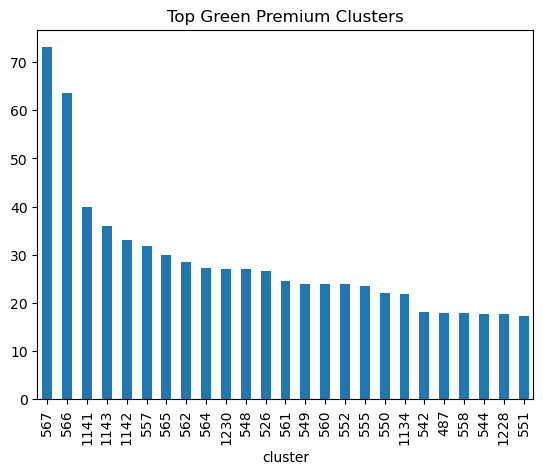

In [4]:
t["green_premium"].sort_values(ascending=False)[:25].plot(kind="bar", title="Top Green Premium Clusters")

This graph shows us the top 25 clusters with the highest premium. We can see here that all of this have a higher premium than the one that was used by the analyst. If we look to our top 50 clusters we found that our green premium mean is of $21.40, 10 times more of what the analyst used, and a median of $17.16 which is still way higher than the number proposed by our analyst.

In [5]:
t["green_premium"].sort_values(ascending=False)[:50].describe()

count    50.000000
mean     21.402900
std      11.916332
min      12.000000
25%      14.275000
50%      17.165000
75%      24.450000
max      73.070000
Name: green_premium, dtype: float64

<Axes: title={'center': 'Lowest Green Premium Clusters'}, xlabel='cluster'>

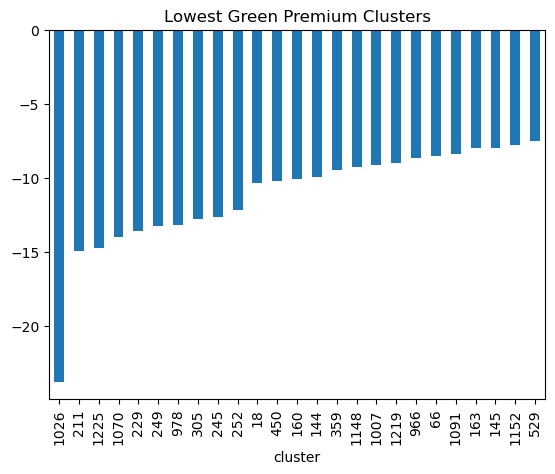

In [6]:
t["green_premium"].sort_values(ascending=True)[:25].plot(kind="bar", title="Lowest Green Premium Clusters")

We also need to look at our lowest 25 green premium clusters, we can see that there is a high difference between the value proposed by the analyst, we are even finding that the "green premium" does not longer exist and we are actually losing money for being green. If we look to our bottom 50 clusters we can still find that there is a average loss of -$8.55 with a median of -$7.50. This gives us a difference of around -$10 from what the analyst projected.

In [7]:
t["green_premium"].sort_values(ascending=True)[:50].describe()

count    50.000000
mean     -8.546000
std       3.668893
min     -23.750000
25%     -10.056250
50%      -7.500000
75%      -5.562500
max      -5.000000
Name: green_premium, dtype: float64

Text(0, 0.5, 'USD per Square Foot')

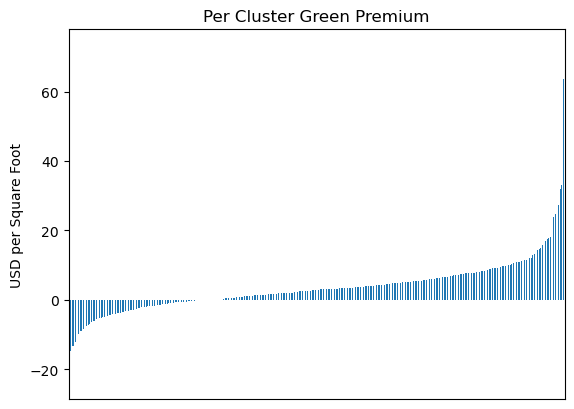

In [8]:
p = t["green_premium"].sort_values(ascending=True).plot(kind="bar")
x = p.get_xaxis()
x.set_visible(False)
p.set_title("Per Cluster Green Premium")
p.set_ylabel("USD per Square Foot")

Since we have looked at both our top and our bottom clusters we would like to look how the green premium performs across the data set. We can tell that most of the clusters do have a green premium associated with them. On average we see that we fall on the $3.48 premium with the median $2.89 just a little bit higher than what our analyst predicted.

This interpretation tells us that the simple factor of being green is not enough for making a decision, but we also need to be very careful on which cluster our building will be. 

In [9]:
t["green_premium"].describe()

count    684.000000
mean       3.480314
std        7.636769
min      -23.750000
25%       -0.290000
50%        2.885000
75%        6.338750
max       73.070000
Name: green_premium, dtype: float64

In [10]:
green_b = gb_data[gb_data["green_rating"] == 1]
regular_b = gb_data[gb_data["green_rating"] == 0]

green_b

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.0137,0.0290,36.780
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.0101,0.0289,17.500
16,431225,8,409889,67.78,30.50,97.06,20,6,0,1,...,1,0,0,5240,956,6196,10.46,0.0120,0.0235,25.500
29,204299,11,525422,1.74,25.00,71.10,16,23,0,1,...,1,0,1,1113,6001,7114,41.32,0.0108,0.0233,22.000
34,437486,13,378538,3.27,26.61,95.54,17,22,0,1,...,1,0,1,2269,2382,4651,40.70,0.0138,0.0229,25.055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,247971,1226,207082,2.38,50.85,88.99,10,35,1,1,...,1,0,1,684,1419,2103,22.71,0.0103,0.0378,36.000
7775,129467,1227,279507,0.97,50.95,100.00,8,40,1,1,...,1,0,1,1813,3904,5717,45.73,0.0145,0.0327,43.355
7831,250091,1228,256739,2.38,57.00,86.40,10,7,0,1,...,1,0,1,684,1419,2103,22.71,0.0103,0.0378,48.205
7835,246952,1229,82771,2.38,59.40,93.79,9,32,0,1,...,1,0,1,684,1419,2103,22.71,0.0103,0.0378,54.000


In [11]:
green_b["Rent"].describe()

count    684.000000
mean      30.028480
std       12.955452
min        8.870000
25%       21.497500
50%       27.600000
75%       35.540000
max      138.070000
Name: Rent, dtype: float64

In [12]:
regular_b["Rent"].describe()

count    6995.000000
mean       28.444779
std        15.328287
min         2.980000
25%        19.430000
50%        25.030000
75%        34.180000
max       250.000000
Name: Rent, dtype: float64